# Problema do Alinhamento de Sequencias de DNA
## Uma abordagem sobre o desempenho de diferentes algoritmos
### Aluno: Marcelo Cesário Miguel

#### imports

In [1]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
def create_inputs(n_max,dimension):
    list_inputs = []
    for n in np.arange(4,n_max+1,1):
        if dimension == '2d':
            m = n
            seq=str(n)+' '+str(m)+" "+''.join(random.choices(['A','T','C','G','-'],k=n))+' '+\
            ''.join(random.choices(['A','T','C','G','-'],k=m))
            list_inputs.append(seq)
        else:
            for m in np.arange(4,n_max+1,1):
                # m = random.randint(n,n*5)
                # m = n # comentar caso tenha m diferente
                seq=str(n)+' '+str(m)+" "+''.join(random.choices(['A','T','C','G','-'],k=n))+' '+\
                ''.join(random.choices(['A','T','C','G','-'],k=m))
                list_inputs.append(seq)
    return list_inputs

## Análise com Smith Waterman e Random Local Search

In [3]:
df = pd.DataFrame(columns=['Saida','Tempo','n','Algoritmo'])

list_alg = {'./main' : 'Smith Waterman','./random_local_search/main' : 'Random Local Search'}

def get_list_program(list_alg,list_inputs ,step ):
    list_execute=[]
    for i in list_alg:
        for input_ in list_inputs[::step]:
            n = input_.split()[0]
            m = input_.split()[1]
            start = time.perf_counter()
            proc = subprocess.run([i], input=input_, text=True, capture_output=True)
            end = time.perf_counter()
            algoritmo = list_alg[i]
            dic = {
                'Tempo':float(end-start),
                'Saida':int(proc.stdout.split()[-1]),
                'n': int(n),
                'm': int(m),
                'Algoritmo': algoritmo
            }
            list_execute.append(dic)
    return list_execute

In [4]:
list_inputs = create_inputs(700,'2d')
list_execute = get_list_program(list_alg,list_inputs,1)

In [5]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [6]:
df

,Tempo,Saida,n,m,Algoritmo
0,0.043601,6,4,4,Smith Waterman
1,0.014388,2,5,5,Smith Waterman
2,0.014440,4,6,6,Smith Waterman
3,0.014362,5,7,7,Smith Waterman
4,0.014375,6,8,8,Smith Waterman
...,...,...,...,...,...
1389,0.137973,4,696,696,Random Local Search
1390,0.143620,11,697,697,Random Local Search
1391,0.138438,10,698,698,Random Local Search
1392,0.131414,7,699,699,Random Local Search


### Análise 2d

Análise bidimensional para entradas em que n e m tem o mesmo tamanho

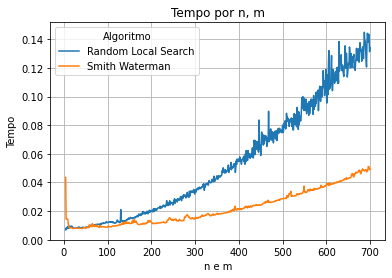

In [7]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot();
plt.title("Tempo por n, m");
plt.ylabel("Tempo");
plt.xlabel('n e m');
plt.grid();

Em uma primeira análise, percebe-se que o tempo do Smith Waterman está abaixo do Random Local Search, apesar da complexibilidade do mesmo, de O(n*m), ser maior que a do Random Local Search.

Além disso, as curvas de tempo de cada um dos dois algoritmos podem estar com ruidos. Isso ocorre pelo fato de que o tempo está sendo calculado de uma maneira simples, apenas calculando a diferença de tempo antes e depois de rodar os algoritmos. Dessa forma, estão inclusos dentro desse cálculo outros processamentos do computador que influenciam no cálculo do tempo.

Dessa forma, caso rodado novamente as células acima que definem os valores do dataframe, o ruido dessa curva de tempo pode aumentar ou diminuir, mas a 'cara' da curva, que nesse caso seria exponencial para as duas continua a mesma

### Alterando o tempo do Random Local Search
Como o algoritmo de busca local do código Random Local Search é repetido 100 vezes para cada 'n', será dividido em 100 o tempo do Random Local Search para calcularmos apenas o tempo do algoritmo de busca local

In [8]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

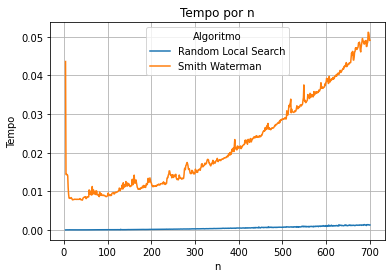

In [9]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

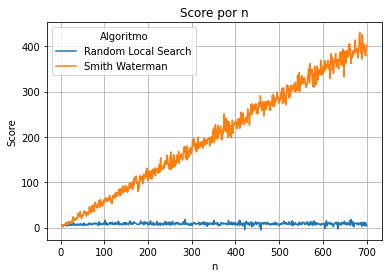

In [10]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

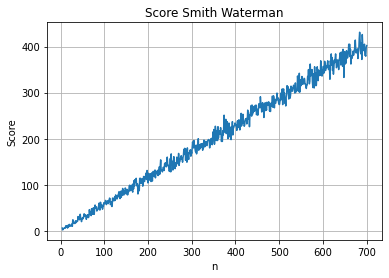

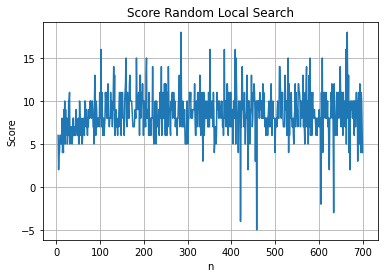

In [11]:
df.pivot(index='n',columns='Algoritmo',values='Saida')['Smith Waterman'].plot();
plt.title("Score Smith Waterman")
plt.grid()
plt.ylabel("Score");
plt.show()
df.pivot(index='n',columns='Algoritmo',values='Saida')['Random Local Search'].plot();
plt.title("Score Random Local Search")
plt.grid()
plt.ylabel("Score");
plt.show()

Análisando os Scores, mais especificamente do Random Local Search, percebe-se que seu Score não aumenta para sequências maiores, isso pode ser um indicativo de que repetir o código por uma constante (no caso 100 vezes) pode não ser o suficiente para garantir um bom desempenho do modelo. Dessa forma, essa constante pode ser baseada no tamanho da entrada de n ou m, por exemplo, para que a aleatoriedade acompanhe o tamanho de uma sequência.

Da mesma forma, pode não fazer sentido repetir o código 100 vezes para uma sequência muito pequena, pelo fato de que esse excesso de tentativas pode aproximar muito a busca local da busca exausta, uma vez que a busca local acabe testando todas as possibilidades possíveis por conta da entrada ser pequena em relação a entrada

#### Primeira análise em 3d

In [12]:
list_inputs = create_inputs(75,'3d')
list_execute = get_list_program(list_alg,list_inputs,10)

In [13]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [ ]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

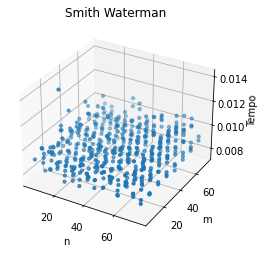

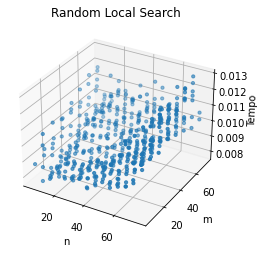

In [27]:
df_smith = df.loc[df['Algoritmo'] == 'Smith Waterman']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_smith['n'], df_smith['m'], df_smith['Tempo'], s=10)
plt.title("Smith Waterman")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo')
plt.show()

df_random = df.loc[df['Algoritmo'] == 'Random Local Search']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_random['n'], df_random['m'], df_random['Tempo'], s=10)
plt.title("Random Local Search")
plt.xlabel('n')
plt.ylabel('m')
ax.set_zlabel('Tempo');

Como o calculo do tempo no python pode gerar alguns ruídos, análisar em 3d pode não ser a melhor opção para verificar a curva do tempo em função do aumento das entradas n e m

### Adicionando Exaustive Search

In [60]:
list_alg_exaust = {'./main' : 'Smith Waterman',
                   './random_local_search/main' : 'Random Local Search',
                   './exaustive_search/main':'Exaustive Search'}

In [61]:
print("Esse código pode demorar alguns minutos")
list_inputs = create_inputs(401,'2d')
list_execute = get_list_program(list_alg_exaust,list_inputs,100)

Esse código pode demorar alguns minutos


In [62]:
df = pd.DataFrame(list_execute)
df= df.apply(pd.to_numeric,errors="ignore")

In [63]:
df.loc[df['Algoritmo'] == 'Random Local Search','Tempo'] /=100

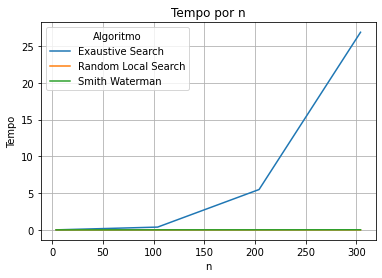

In [64]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

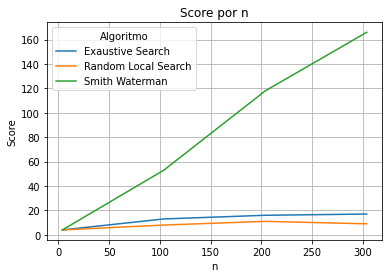

In [65]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");

### Analisando variações no tempo do algoritmo smith

In [ ]:
def plot_corr(x_,y_,title):
    sns.regplot(x_,y_, color=('#a29bec'))
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
df_teste = df.loc[(df['n']<500) & (df['Algoritmo']== 'Smith') & (df['n']%10 == 0) ]

df_teste.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Tempo");
for i in np.arange(0,len(df_teste),1):
    plt.annotate(str(df_teste.iloc[i]["Saida"]),xy=(df_teste.iloc[i]["n"],df_teste.iloc[i]["Tempo"]))

### Correlação da diferença |n-m| e o tempo

In [ ]:
df['|n-m|'] = ((df['n'] - df['m'])**2)**(1/2)

In [ ]:
df['|n-m|']

In [ ]:
df_smith = df.loc[df['Algoritmo']=='Smith']
plot_corr(df_smith['|n-m|'],df_smith['Tempo'],"Correlação |n-m| por Tempo")

In [ ]:
df_smith['Tempo'].corr(df_smith['|n-m|'])